# Random Forest on a Company Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [2]:
company=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Random Forests\\Company_Data.csv")

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [6]:
company.loc[company['Sales']<=7.49,'Sales']=0 #here '0' indicates sales were low
company[company['Sales']<=7.49]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
6,0.0,115,105,0,45,108,Medium,71,15,Yes,No
8,0.0,132,110,0,108,124,Medium,76,10,No,No
9,0.0,132,113,0,131,124,Medium,76,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
393,0.0,109,51,10,26,120,Medium,30,17,No,Yes
394,0.0,130,58,19,366,139,Bad,33,16,Yes,Yes
396,0.0,139,23,3,37,120,Medium,55,11,No,Yes
397,0.0,162,26,12,368,159,Medium,40,18,Yes,Yes


In [7]:
company.loc[company['Sales']>7.49,'Sales']=1
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,Good,33,14,Yes,Yes
396,0.0,139,23,3,37,120,Medium,55,11,No,Yes
397,0.0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0.0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
company.CompPrice.unique()

array([138, 111, 113, 117, 141, 124, 115, 136, 132, 121, 122, 107, 149,
       118, 147, 110, 129, 125, 134, 128, 145, 139,  98, 103, 104, 114,
       131, 109, 130, 119, 157,  77, 123,  85, 127, 126, 116,  99, 153,
       143, 133,  93, 105, 100,  89, 148, 150,  88, 102, 151,  97, 161,
       135, 112,  94, 108,  96, 146, 140, 144, 142, 106, 137, 120, 156,
       155, 162,  86, 159,  95, 175, 154, 152], dtype=int64)

In [9]:
le=LabelEncoder()

In [10]:
import sidetable #for getting percentage of Valuecounts in a Feature
company.stb.freq(['CompPrice'])

,CompPrice,count,percent,cumulative_count,cumulative_percent
0,121,16,4.00,16,4.00
1,131,14,3.50,30,7.50
2,122,14,3.50,44,11.00
3,123,13,3.25,57,14.25
4,132,12,3.00,69,17.25
...,...,...,...,...,...
68,94,1,0.25,396,99.00
69,88,1,0.25,397,99.25
70,86,1,0.25,398,99.50
71,85,1,0.25,399,99.75


In [11]:
#company.CompPrice=le.fit_transform(company.CompPrice)
#company.CompPrice

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

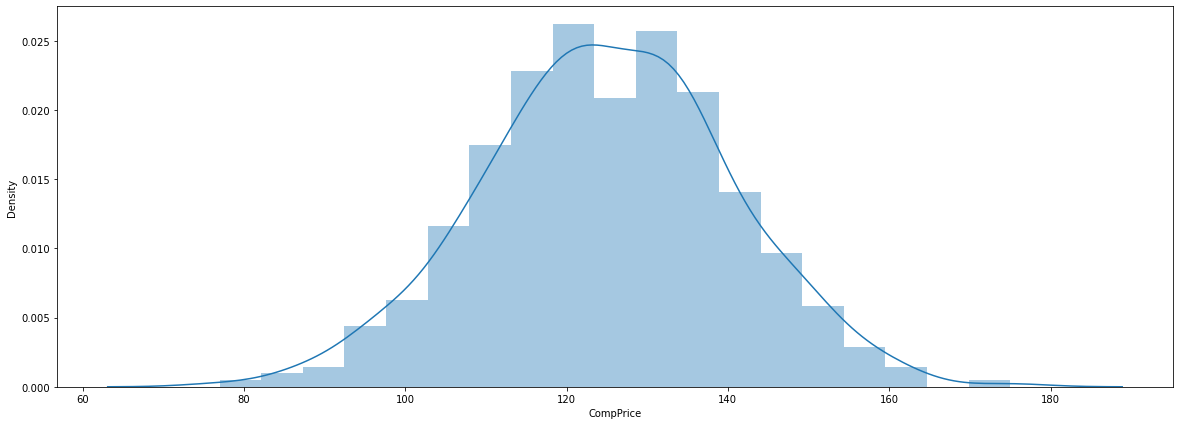

In [12]:
plt.figure(figsize=(20,7))
sns.distplot(company.CompPrice)

In [13]:
company.Income.unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23], dtype=int64)

In [14]:
company.stb.freq(['Income'])

,Income,count,percent,cumulative_count,cumulative_percent
0,69,11,2.75,11,2.75
1,42,10,2.50,21,5.25
2,100,8,2.00,29,7.25
3,32,8,2.00,37,9.25
4,93,7,1.75,44,11.00
...,...,...,...,...,...
93,95,1,0.25,396,99.00
94,55,1,0.25,397,99.25
95,43,1,0.25,398,99.50
96,27,1,0.25,399,99.75


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

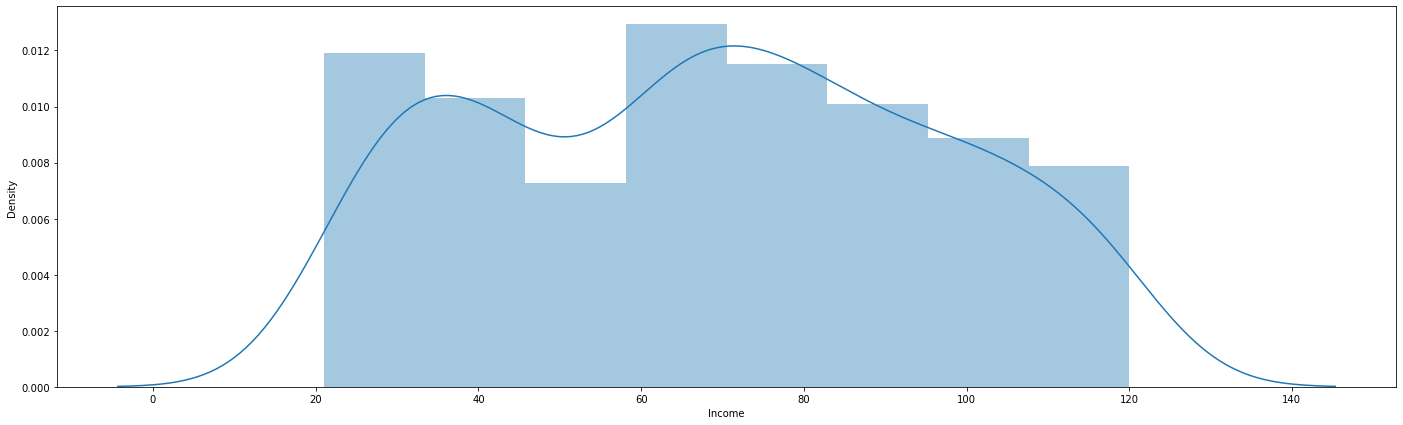

In [15]:
plt.figure(figsize=(24,7))
sns.distplot(company.Income)

In [16]:
company.Advertising.unique()

array([11, 16, 10,  4,  3, 13,  0, 15,  9,  2,  5, 12,  6, 14, 18, 19, 20,
       23,  1,  7, 24,  8, 17, 25, 26, 29, 22, 21], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

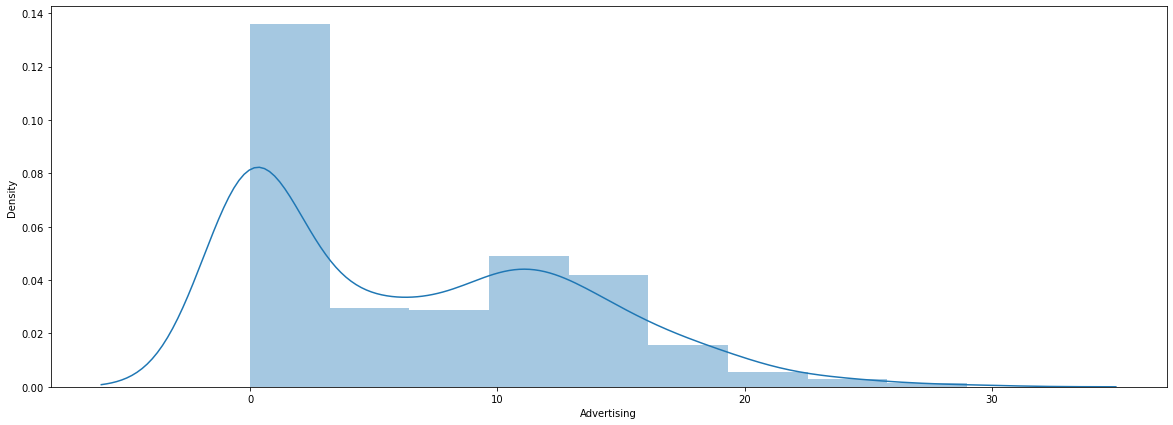

In [17]:
plt.figure(figsize=(20,7))
sns.distplot(company.Advertising)

In [18]:
company.Population.unique()

array([276, 260, 269, 466, 340, 501,  45, 425, 108, 131, 150, 503, 393,
        29, 148, 400, 284, 251, 408,  58, 367, 239, 497, 292, 294, 176,
       496,  19, 359, 226, 447, 241, 236, 317, 406, 270, 412, 454, 144,
        18, 403,  25,  16, 325, 168, 173, 349,  51, 341, 112,  39,  60,
        54,  22, 188, 469, 358, 146, 170, 184, 197, 508, 152, 366, 339,
       237, 432, 125, 480, 346,  44, 139, 286, 353, 468,  52, 304, 272,
       493, 491, 267,  97,  67, 134, 407, 287, 382, 220,  94,  89,  57,
       334, 472, 398, 217, 104, 488, 298, 335,  17,  95, 202, 507, 243,
       137, 249, 380, 181, 192, 350, 279, 208, 232, 265, 327, 384,  10,
       436, 371, 310, 277, 331, 300,  36, 264,  27, 402, 140, 289,  59,
       189, 372, 486,  81, 424,  40, 100, 151, 216, 492, 356, 416, 123,
       207,  38,  70, 434,  79, 230, 426,  35, 449,  93, 142, 509, 297,
        71, 481, 420, 410, 333, 500, 413, 132, 326, 357, 445,  48, 156,
       262, 178, 464, 245,  68, 381, 404, 119,  24, 218, 361, 49

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

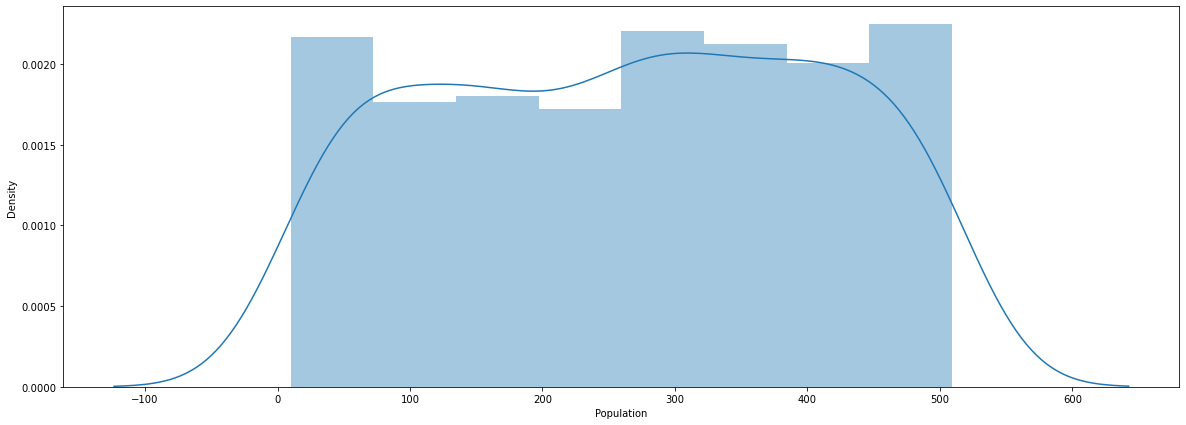

In [19]:
plt.figure(figsize=(20,7))
sns.distplot(company.Population)

In [20]:
company.Price.unique()

array([120,  83,  80,  97, 128,  72, 108, 124, 100,  94, 136,  86, 118,
       144, 110, 131,  68, 121, 109, 138, 113,  82, 107, 102,  89, 137,
        96, 126,  24, 134,  95, 135,  70,  98, 149, 129, 119, 154,  84,
       117, 103, 114, 123, 133, 101, 104,  91, 115,  99, 150, 116,  92,
       145,  90,  79, 139, 112, 111, 125, 148, 132, 127, 106, 151,  87,
       155,  49, 147,  77, 159,  69, 157, 160, 141, 191,  93,  55, 185,
       122,  81, 140, 173, 146, 130,  64, 105, 163,  88, 156, 166,  63,
       158,  74,  54, 171, 152, 143, 164, 162,  53,  78], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

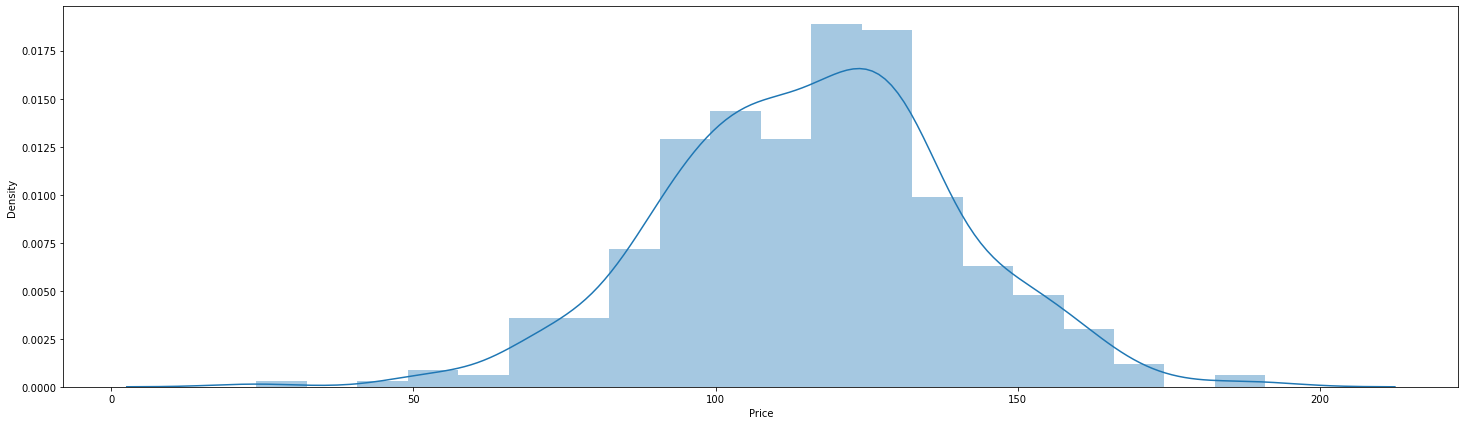

In [21]:
plt.figure(figsize=(25,7))
sns.distplot(company.Price)

In [22]:
company.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [23]:
company.ShelveLoc=le.fit_transform(company.ShelveLoc)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ShelveLoc', ylabel='Density'>

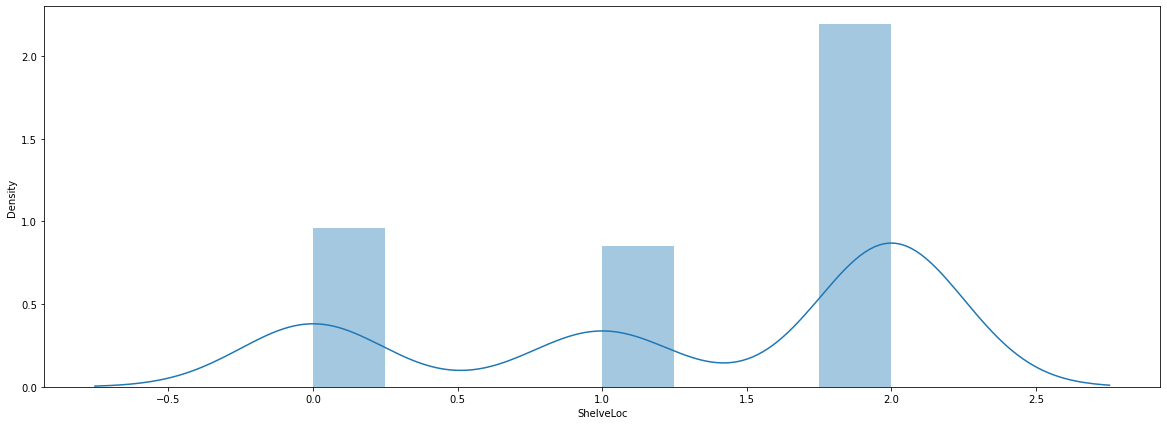

In [24]:
plt.figure(figsize=(20,7))
sns.distplot(company.ShelveLoc)

In [25]:
company.Age.unique()

array([42, 65, 59, 55, 38, 78, 71, 67, 76, 26, 50, 62, 53, 52, 63, 46, 69,
       35, 79, 54, 64, 58, 30, 44, 60, 73, 48, 32, 80, 75, 39, 61, 74, 29,
       77, 56, 47, 25, 31, 36, 41, 68, 70, 28, 43, 49, 45, 33, 34, 51, 40,
       72, 57, 27, 66, 37], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

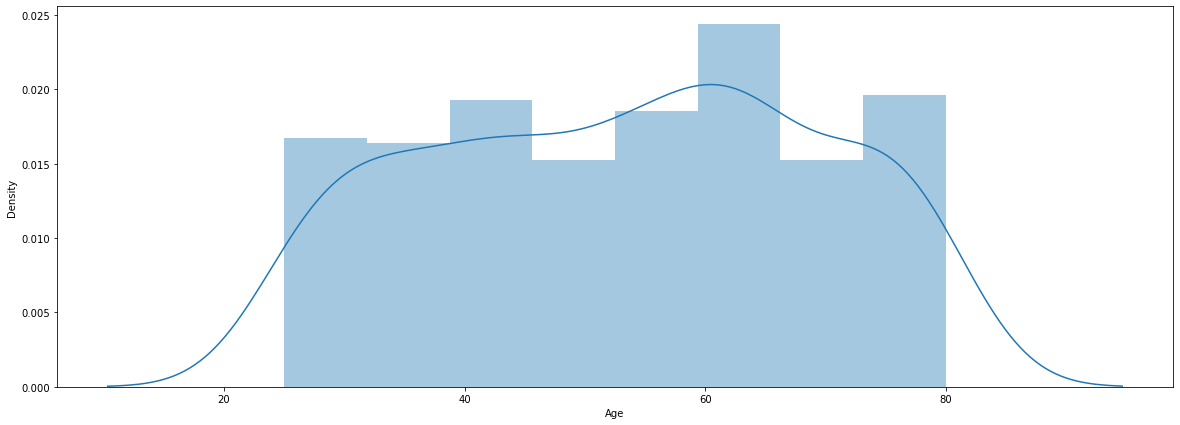

In [26]:
plt.figure(figsize=(20,7))
sns.distplot(company.Age)

In [27]:
company.Education.unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

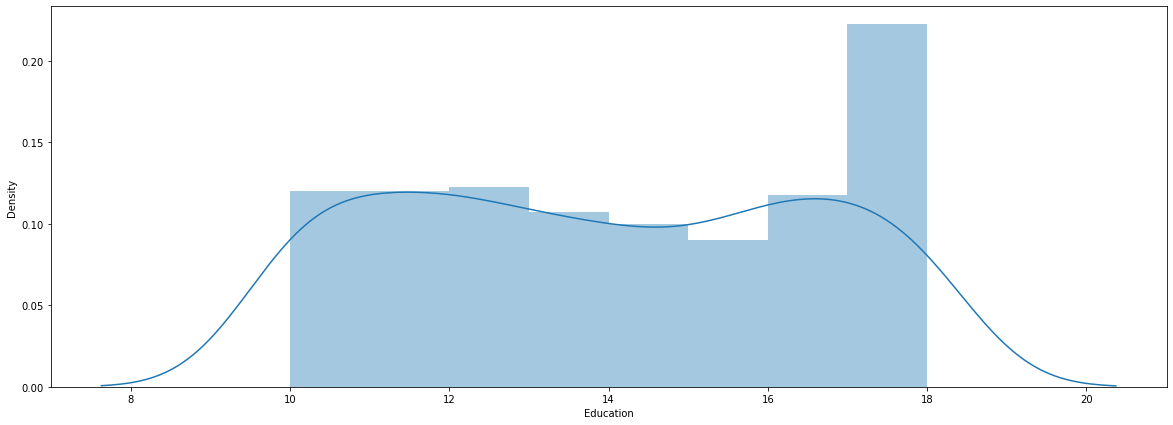

In [28]:
plt.figure(figsize=(20,7))
sns.distplot(company.Education)

In [29]:
company.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [30]:
company.Urban=le.fit_transform(company.Urban)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Urban', ylabel='Density'>

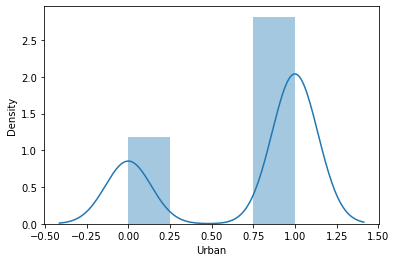

In [31]:
sns.distplot(company.Urban)

In [32]:
company.US.unique()

array(['Yes', 'No'], dtype=object)

In [33]:
company.US=le.fit_transform(company.US)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='US', ylabel='Density'>

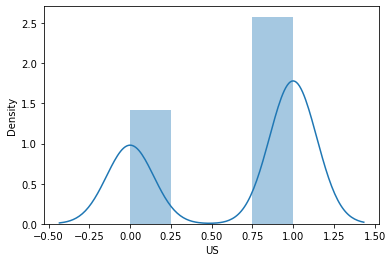

In [34]:
sns.distplot(company.US)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

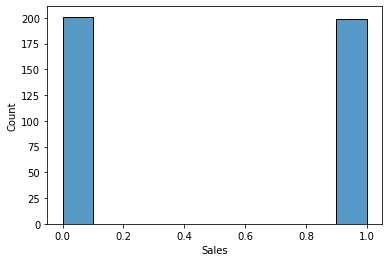

In [35]:
sns.histplot(company.Sales) #We Have Balanced Dataset 

In [36]:
#pip install sidetable  

In [37]:
X=company.iloc[:,1:]
Y=company.iloc[:,:1]


In [38]:
num_tree=300
max_features=3
kfold=KFold(n_splits=10,random_state=None)
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_features)
results=cross_val_score(model,X,Y)
print("Accuracy=",results.mean())

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

Accuracy= 0.795


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [40]:
from yellowbrick import ClassBalance
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix , ROCAUC , ClassPredictionError

classes=['low','high'] #Sales are High or Low

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


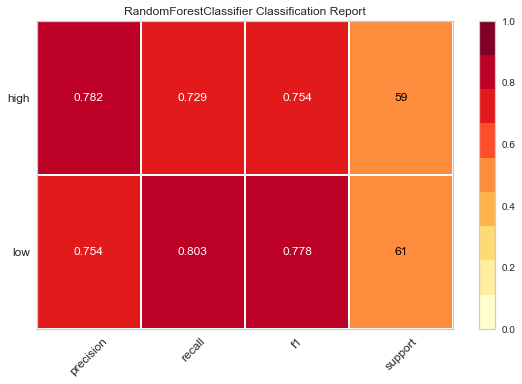

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [41]:
#Classification_Report 
cr_visualizer= ClassificationReport(model,classes=classes,support=True)
cr_visualizer.fit(x_train,y_train)
cr_visualizer.score(x_test,y_test)
cr_visualizer.show()

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


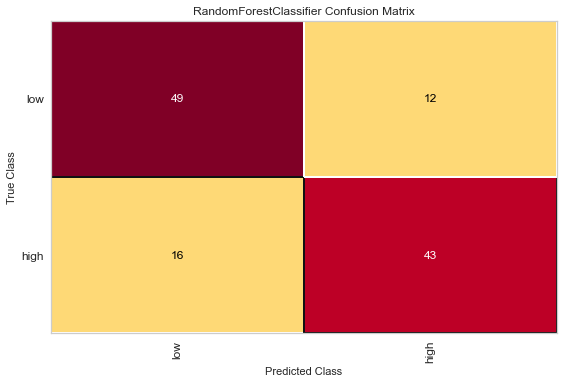

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
#confusion_matrix
cm= ConfusionMatrix(model,classes=classes)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.show()

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


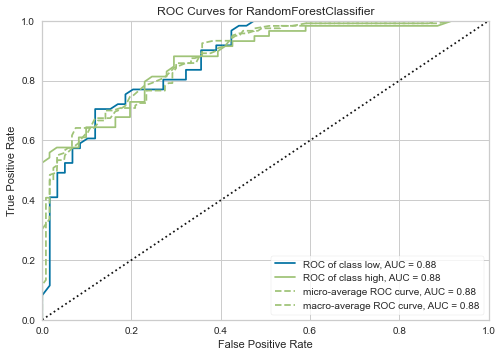

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
#Roc and AUC 
rocauc=ROCAUC(model,classes=classes)
rocauc.fit(x_train,y_train)
rocauc.score(x_test,y_test)
rocauc.show()

In [44]:
# Stacking Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=700)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print("Accuracy=",results.mean())

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Accuracy= 0.795


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Y=Y.astype(np.int_)
from mlxtend.plotting import plot_decision_regions
fig=plot_decision_regions(X.values,Y.values,clf=ensemble,legend=2)
plt.show()

# Let's explore whether other algorithms can provide us with the best accuracy on this dataset.

In [45]:
from lazypredict.Supervised import LazyClassifier
d=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=d.fit(x_train,x_test,y_train,y_test)
print(models)


 31%|███       | 9/29 [00:00<00:00, 28.47it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:00<00:00, 27.82it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 24.50it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.85               0.85     0.85      0.85   
AdaBoostClassifier                 0.84               0.84     0.84      0.84   
CalibratedClassifierCV             0.84               0.84     0.84      0.84   
LinearSVC                          0.84               0.84     0.84      0.84   
RidgeClassifierCV                  0.84               0.84     0.84      0.84   
RidgeClassifier                    0.84               0.84     0.84      0.84   
LinearDiscriminantAnalysis         0.84               0.84     0.84      0.84   
QuadraticDiscriminantAnalysis      0.82               0.82     0.82      0.82   
GaussianNB                         0.82               0.82     0.82      0.82   
Perceptron                         0.82               0.82     0.82      0.82   
SVC                         